<a href="https://colab.research.google.com/github/RioDeMilo/Data-analysis-with-python-projects/blob/main/Medical_Data_visualizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#import data
df = pd.read_csv('/content/medical_examination.csv')


<tbody>
<tr>
<td align="center">Age</td>
<td align="center">Objective Feature</td>
<td align="center"><code>age</code></td>
<td align="center">int (days)</td>
</tr>
<tr>
<td align="center">Height</td>
<td align="center">Objective Feature</td>
<td align="center"><code>height</code></td>
<td align="center">int (cm)</td>
</tr>
<tr>
<td align="center">Weight</td>
<td align="center">Objective Feature</td>
<td align="center"><code>weight</code></td>
<td align="center">float (kg)</td>
</tr>
<tr>
<td align="center">Gender</td>
<td align="center">Objective Feature</td>
<td align="center"><code>gender</code></td>
<td align="center">categorical code</td>
</tr>
<tr>
<td align="center">Systolic blood pressure</td>
<td align="center">Examination Feature</td>
<td align="center"><code>ap_hi</code></td>
<td align="center">int</td>
</tr>
<tr>
<td align="center">Diastolic blood pressure</td>
<td align="center">Examination Feature</td>
<td align="center"><code>ap_lo</code></td>
<td align="center">int</td>
</tr>
<tr>
<td align="center">Cholesterol</td>
<td align="center">Examination Feature</td>
<td align="center"><code>cholesterol</code></td>
<td align="center">1: normal, 2: above normal, 3: well above normal</td>
</tr>
<tr>
<td align="center">Glucose</td>
<td align="center">Examination Feature</td>
<td align="center"><code>gluc</code></td>
<td align="center">1: normal, 2: above normal, 3: well above normal</td>
</tr>
<tr>
<td align="center">Smoking</td>
<td align="center">Subjective Feature</td>
<td align="center"><code>smoke</code></td>
<td align="center">binary</td>
</tr>
<tr>
<td align="center">Alcohol intake</td>
<td align="center">Subjective Feature</td>
<td align="center"><code>alco</code></td>
<td align="center">binary</td>
</tr>
<tr>
<td align="center">Physical activity</td>
<td align="center">Subjective Feature</td>
<td align="center"><code>active</code></td>
<td align="center">binary</td>
</tr>
<tr>
<td align="center">Presence or absence of cardiovascular disease</td>
<td align="center">Target Variable</td>
<td align="center"><code>cardio</code></td>
<td align="center">binary</td>
</tr>
</tbody>
# tasks
<p>Create a chart similar to <code>examples/Figure_1.png</code>, where we show the counts of good and bad outcomes for the <code>cholesterol</code>, <code>gluc</code>, <code>alco</code>, <code>active</code>, and <code>smoke</code> variables for patients with cardio=1 and cardio=0 in different panels.</p>
<ul>
<li>Add an <code>overweight</code> column to the data. To determine if a person is overweight, first calculate their BMI by dividing their weight in kilograms by the square of their height in meters. If that value is &gt; 25 then the person is overweight. Use the value 0 for NOT overweight and the value 1 for overweight.</li>
<li>Normalize the data by making 0 always good and 1 always bad. If the value of <code>cholesterol</code> or <code>gluc</code> is 1, make the value 0. If the value is more than 1, make the value 1.</li>
<li>Convert the data into long format and create a chart that shows the value counts of the categorical features using seaborn's <code>catplot()</code>. The dataset should be split by 'Cardio' so there is one chart for each <code>cardio</code> value. The chart should look like <code>examples/Figure_1.png</code>.</li>
<li>Clean the data. Filter out the following patient segments that represent incorrect data:
<ul>
<li>diastolic pressure is higher than systolic (Keep the correct data with <code>(df['ap_lo'] &lt;= df['ap_hi'])</code>)</li>
<li>height is less than the 2.5th percentile (Keep the correct data with <code>(df['height'] &gt;= df['height'].quantile(0.025))</code>)</li>
<li>height is more than the 97.5th percentile</li>
<li>weight is less than the 2.5th percentile</li>
<li>weight is more than the 97.5th percentile</li>
</ul>
</li>
<li>Create a correlation matrix using the dataset. Plot the correlation matrix using seaborn's <code>heatmap()</code>. Mask the upper triangle. The chart should look like <code>examples/Figure_2.png</code>.</li>
</ul>


In [ ]:
corr = (df_heat.corr().round(1))
corr

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0
age,0.0,1.0,-0.0,-0.1,0.1,0.0,0.2,0.1,0.1,-0.0,-0.0,-0.0,0.2,0.1
sex,0.0,-0.0,1.0,0.5,0.1,0.0,0.1,-0.0,-0.0,0.3,0.2,0.0,0.0,-0.1
height,0.0,-0.1,0.5,1.0,0.3,0.0,0.0,-0.1,-0.0,0.2,0.1,-0.0,-0.0,-0.1
weight,0.0,0.1,0.1,0.3,1.0,0.0,0.2,0.1,0.1,0.1,0.1,-0.0,0.2,0.7
ap_hi,0.0,0.0,0.0,0.0,0.0,1.0,0.1,0.0,0.0,-0.0,0.0,-0.0,0.1,0.0
ap_lo,0.0,0.2,0.1,0.0,0.2,0.1,1.0,0.2,0.1,0.0,0.0,0.0,0.3,0.2
cholesterol,0.0,0.1,-0.0,-0.1,0.1,0.0,0.2,1.0,0.4,0.0,0.0,0.0,0.2,0.1
gluc,0.0,0.1,-0.0,-0.0,0.1,0.0,0.1,0.4,1.0,-0.0,0.0,-0.0,0.1,0.1
smoke,-0.0,-0.0,0.3,0.2,0.1,-0.0,0.0,0.0,-0.0,1.0,0.3,0.0,-0.0,-0.0


<AxesSubplot:>

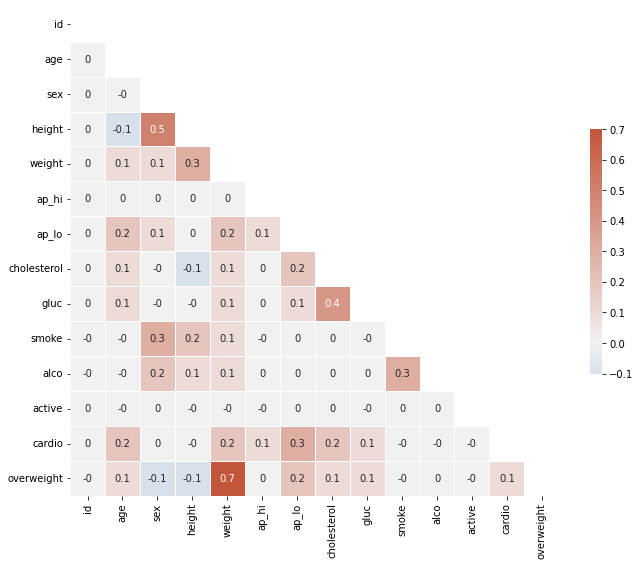

In [ ]:
#the function .corr gives you the correlation matrix from a given dataframe
corr = (df_heat.corr()).round(1)
mask = np.triu(np.ones_like(corr,dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(250, 20, as_cmap=True)

sns.heatmap(corr, mask=mask,cmap =cmap, center=0, annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


In [ ]:
#here in this case we add the conditions for the clean database that filter the values in this case adding the required conditions for being a valid data 
df_heat = df[(df['ap_lo'] <= df['ap_hi'])&
             (df['height'] >= df['height'].quantile(0.025)) & 
             (df['height'] <= df['height'].quantile(0.975)) & 
             (df['weight'] >= df['weight'].quantile(0.025)) &
             (df['weight'] <= df['weight'].quantile(0.975))]
df_heat

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,1.68,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,1.56,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,1.65,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,1.69,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,1.56,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,19699,1,1.72,70.0,130,90,0,0,0,0,1,1,0
69994,99992,21074,1,1.65,80.0,150,80,0,0,0,0,1,1,1
69995,99993,19240,2,1.68,76.0,120,80,0,0,1,0,1,0,1
69998,99998,22431,1,1.63,72.0,135,80,0,1,0,0,0,1,1


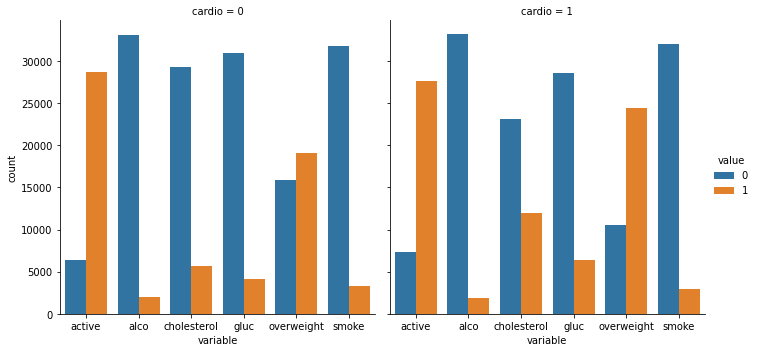

In [ ]:
# i was getting an synthax error thanks to the parenthesis that needs to cover all the melt function and not only the value_bars
df_cat = df.melt(id_vars = 'cardio', value_vars=["active", "alco", "cholesterol", "gluc", "overweight", "smoke"])
# Group and reformat the data to split it by 'cardio'. Show the counts of each feature. You will have to rename one of the columns for the catplot to work correctly.
sns.catplot(data=df_cat, kind="count",  x="variable", hue="value", col="cardio")

In [ ]:
# thanks to a post i learned that this is how it is supposed to be presented the data now i need it to be separeted in cardio
df.melt(id_vars = ['cardio'], value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active','overweight'])


,cardio,variable,value
0,0,cholesterol,0
1,1,cholesterol,1
2,1,cholesterol,1
3,1,cholesterol,0
4,0,cholesterol,0
...,...,...,...
419995,0,overweight,1
419996,1,overweight,1
419997,1,overweight,1
419998,1,overweight,1


In [ ]:
##using the same .replace to change the mask values if the column
df['cholesterol'] = (df['cholesterol'] == 1).replace({True:0,False:1})
df['gluc'] = (df['gluc'] == 1).replace({True:0,False:1})


In [ ]:
#overweight column
#First  convert the height in CM to Meters
# be carefull runing the code multiple times as it will change the value of the height 
#here i create a mask with the >= condition and then i replace it with .replace that accepts dictionaries 
df['height'] = df['height'] * 0.01
df['overweight'] = ((df['weight'] / (df['height'])**2) >= 25).replace({True:1,False:0})
df.loc[:]

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,1.68,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,1.56,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,1.65,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,1.69,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,1.56,56.0,100,60,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,1.68,76.0,120,80,1,1,1,0,1,0,1
69996,99995,22601,1,1.58,126.0,140,90,2,2,0,0,1,1,1
69997,99996,19066,2,1.83,105.0,180,90,3,1,0,1,0,1,1
69998,99998,22431,1,1.63,72.0,135,80,1,2,0,0,0,1,1


In [ ]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   sex          70000 non-null  int64  
 3   height       70000 non-null  float64
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
 13  overweight   70000 non-null  int64  
dtypes: float64(2), int64(12)
memory usage: 7.5 MB


,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,1.68,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,1.56,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,1.65,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,1.69,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,1.56,56.0,100,60,1,1,0,0,0,0,0


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Import data
df = pd.read_csv('medical_examination.csv')

# Add 'overweight' column
df['height'] = df['height'] * 0.01
df['overweight'] = ((df['weight'] / (df['height'])**2) >= 25).replace({True:1,False:0})


# Normalize data by making 0 always good and 1 always bad. If the value of 'cholesterol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.
##using the same .replace to change the mask values if the column
df['cholesterol'] = (df['cholesterol'] == 1).replace({True:0,False:1})
df['gluc'] = (df['gluc'] == 1).replace({True:0,False:1})

# Draw Categorical Plot
def draw_cat_plot():
    # Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
    # thanks to a post i learned that this is how it is supposed to be presented the data now i need it to be separeted in cardio
    df_cat = df.melt(id_vars = ['cardio'], value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active','overweight'])

    # Group and reformat the data to split it by 'cardio'. Show the counts of each feature. You will have to rename one of the columns for the catplot to work correctly.
    df_cat = df.melt(id_vars = 'cardio', value_vars=["active", "alco", "cholesterol", "gluc", "overweight", "smoke"])
    

    # Draw the catplot with 'sns.catplot()'
    
    sns.catplot(data=df_cat, kind="count",  x="variable", hue="value", col="cardio")



    # Get the figure for the output
    fig = sns.catplot(data=df_cat, kind="count",  x="variable", hue="value", col="cardio")


    # Do not modify the next two lines
    fig.savefig('catplot.png')
    return fig


# Draw Heat Map
def draw_heat_map():
    # Clean the data
     #here in this case we add the conditions for the clean database that filter the values in this case adding the required conditions for being a valid data 
    df_heat = df[(df['ap_lo'] <= df['ap_hi'])&
             (df['height'] >= df['height'].quantile(0.025)) & 
             (df['height'] <= df['height'].quantile(0.975)) & 
             (df['weight'] >= df['weight'].quantile(0.025)) &
             (df['weight'] <= df['weight'].quantile(0.975))]


    # Calculate the correlation matrix
    corr = df.corr()

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr,dtype=bool))
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(250, 20, as_cmap=True)

    # Set up the matplotlib figure
    fig, ax = plt.subplots(figsize=(11, 9))

    # Draw the heatmap with 'sns.heatmap()'

    sns.heatmap(corr, mask=mask,cmap =cmap, center=0, annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

    # Do not modify the next two lines
    fig.savefig('heatmap.png')
    return fig
